In [1]:
#importing Libraries

import bqplot
import numpy as np
import ipywidgets
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# reading the excel file 
df= pd.ExcelFile('https://cdn-assets.theforage.com/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx')

In [3]:
# extracting the sheet which we will be using.

transactions_df = pd.read_excel(df, sheet_name = 'Transactions', header=0, skiprows=[0] )

In [4]:
# Setting transaction id as our index
transactions_df.set_index('transaction_id', inplace = True)

In [5]:
transactions_df.dropna()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0


In [6]:
transactions_df.dtypes

product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

### Plotting simple graphs

In [7]:
transactions_df['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

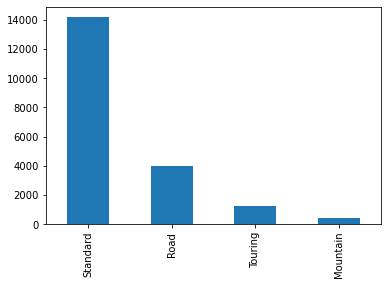

In [8]:
# Count of product lines 

transactions_df['product_line'].value_counts().plot(kind='bar')

In [9]:
transactions_df['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [10]:
len(transactions_df[(transactions_df['online_order']==0.0) & (transactions_df['product_line']=='Mountain')].value_counts())

195

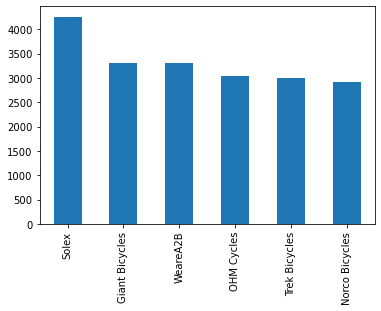

In [11]:
transactions_df['brand'].value_counts().plot(kind='bar')

## First Barplot

In [12]:
# Part 1

x_scale = bqplot.OrdinalScale()
y_scale = bqplot.LinearScale()

In [13]:
# 3. Axis
x_axis = bqplot.Axis(label='Product Line', scale=x_scale)
y_axis = bqplot.Axis(label='Count', scale=y_scale, orientation='vertical')

In [14]:
bar1 = bqplot.Bars(x=transactions_df['product_line'].astype(str).unique(), 
                   y=transactions_df['product_line'].value_counts(),scales = {'x':x_scale , 
                                                                              'y':y_scale}, 
                                                                               interactions={'click':'select'},
                                                                               unselected_style={'fill':'grey'})

In [15]:
figure_bar1 = bqplot.Figure(marks = [bar1], axes = [x_axis,y_axis])

In [16]:
figure_bar1

Figure(axes=[Axis(label='Product Line', scale=OrdinalScale()), Axis(label='Count', orientation='vertical', sca…

In [17]:
# interactivity element

def on_selected(change):
    print(change)

In [18]:
# 2. SCALE
x_scale = bqplot.OrdinalScale()
y_scale = bqplot.LinearScale()

# 3. AXIS
x_axis = bqplot.Axis(label='Product Line', scale=x_scale)
y_axis = bqplot.Axis(label='Count', scale=y_scale, orientation='vertical')

# 4. MARKS
bar1 = bqplot.Bars(x=transactions_df['product_line'].astype(str).unique(), 
                   y=transactions_df['product_line'].value_counts(),scales = {'x':x_scale , 
                                                                              'y':y_scale}, 
                                                                               interactions={'click':'select'},
                                                                               unselected_style={'fill':'grey'})

# 5. INTERACTIVITY
bar1.observe(on_selected, 'selected')

# FINAL FIGURE
figure_bar1 = bqplot.Figure(marks = [bar1], axes = [x_axis,y_axis])
figure_bar1

Figure(axes=[Axis(label='Product Line', scale=OrdinalScale()), Axis(label='Count', orientation='vertical', sca…

We can see that when we select a column, the other columns become grey in color and the one which is selected is in blue color.

In [19]:
def on_selected(change):
    print(change['owner'].selected)

In [20]:
# 2. SCALE
x_scale = bqplot.OrdinalScale()
y_scale = bqplot.LinearScale()

# 3. AXIS
x_axis = bqplot.Axis(label='Product Line', scale=x_scale)
y_axis = bqplot.Axis(label='Count', scale=y_scale, orientation='vertical')

# 4. MARKS
bar1 = bqplot.Bars(x=transactions_df['product_line'].astype(str).unique(), 
                   y=transactions_df['product_line'].value_counts(),scales = {'x':x_scale , 
                                                                              'y':y_scale}, 
                                                                               interactions={'click':'select'},
                                                                               unselected_style={'fill':'grey'})

# 5. INTERACTIVITY
bar1.observe(on_selected, 'selected')

# FINAL FIGURE
figure_bar1 = bqplot.Figure(marks = [bar1], axes = [x_axis,y_axis])
figure_bar1

Figure(axes=[Axis(label='Product Line', scale=OrdinalScale()), Axis(label='Count', orientation='vertical', sca…

After selecting, in addition to changes in color, here we can see that the index is also printed at the bottom

In [21]:
# Using a label to show what column we selected.

selectedLabel = ipywidgets.Label()
#selectedLabel2 = ipywidgets.Label()

In [22]:
# Final interactivity element

pl_map = ['Standard', 'Road', 'Mountain', 'Touring']
def on_selected(change):
    if change['owner'].selected == None:
        v = 'None'
    else:
        v = pl_map[change['owner'].selected[0]]
        
    selectedLabel.value = 'Selected Product Line: ' + v
    #selectedLabel2.value = bar1.y[change['owner'].selected].astype(str)

In [23]:
# 2. SCALE
x_scale = bqplot.OrdinalScale()
y_scale = bqplot.LinearScale()

# 3. AXIS
x_axis = bqplot.Axis(label='Product Line', scale=x_scale)
y_axis = bqplot.Axis(label='Count', scale=y_scale, orientation='vertical')

# 4. MARKS
bar1 = bqplot.Bars(x=transactions_df['product_line'].astype(str).unique(), 
                   y=transactions_df['product_line'].value_counts(),scales = {'x':x_scale , 
                                                                              'y':y_scale}, 
                                                                               interactions={'click':'select'},
                                                                               unselected_style={'fill':'grey'})

# 5. INTERACTIVITY
bar1.observe(on_selected, 'selected')

# FINAL FIGURE
figure_bar1 = bqplot.Figure(marks = [bar1], axes = [x_axis,y_axis])
figure_bar1

Figure(axes=[Axis(label='Product Line', scale=OrdinalScale()), Axis(label='Count', orientation='vertical', sca…

## Second Barplot

In [24]:
# 2. SCALES
x_scale2 = bqplot.OrdinalScale()
y_scale2 = bqplot.LinearScale()

# 3. AXIS
x_axis2 = bqplot.Axis(label='Online Order', scale=x_scale2)
y_axis2 = bqplot.Axis(label='Count', scale=y_scale2, orientation='vertical')

# 4. MARKS
bar2 = bqplot.Bars(x=transactions_df['online_order'].astype(str).unique(), 
                   y=transactions_df['online_order'].value_counts(),scales = {'x':x_scale2 , 'y':y_scale2},
                  colors = 'green')



# FINAL FIGURE
figure_bar2 = bqplot.Figure(marks = [bar2], axes = [x_axis2,y_axis2])
figure_bar2

Figure(axes=[Axis(label='Online Order', scale=OrdinalScale()), Axis(label='Count', orientation='vertical', sca…

## Using ipywidgets on a different graph

In [25]:
x_widget = ipywidgets.Dropdown(options=transactions_df.columns, description='x-axis')
x_widget

Dropdown(description='x-axis', options=('product_id', 'customer_id', 'transaction_date', 'online_order', 'orde…

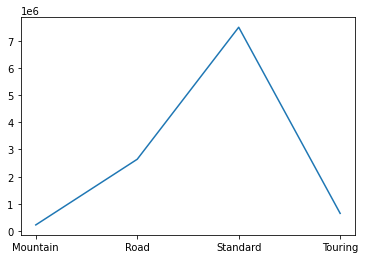

In [26]:
plt.plot(transactions_df.groupby("product_line")["standard_cost"].sum())
plt.show()

In [27]:
@ipywidgets.interact(x=x_widget)
def line_plot(x):
    plt.plot(transactions_df.groupby(x)["standard_cost"].sum())
    plt.xlabel(x)
    plt.ylabel('Sum of standard cost')
    plt.show()

interactive(children=(Dropdown(description='x-axis', options=('product_id', 'customer_id', 'transaction_date',…

In [28]:
'''# 2. SCALES
x_scale_2 = bqplot.DateScale(min=dt.datetime(2017,1,1), max=dt.datetime(2017,12,30))
y_scale_2 = bqplot.LogScale()

# 3. AXIS
x_axis_2 = bqplot.Axis(label='column', scale=x_scale_2)
y_axis_2 = bqplot.Axis(label='Standard Cost', scale=y_scale_2, orientation='vertical')

# 4. MARKS
line = bqplot.Lines(x=x, y=y, scales = {'x':x_scale_2 , 'y':y_scale_2})

figure_line = bqplot.Figure(marks = [line], axes = [x_axis_2,y_axis_2], interaction = pz)

figure_line'''

"# 2. SCALES\nx_scale_2 = bqplot.DateScale(min=dt.datetime(2017,1,1), max=dt.datetime(2017,12,30))\ny_scale_2 = bqplot.LogScale()\n\n# 3. AXIS\nx_axis_2 = bqplot.Axis(label='column', scale=x_scale_2)\ny_axis_2 = bqplot.Axis(label='Standard Cost', scale=y_scale_2, orientation='vertical')\n\n# 4. MARKS\nline = bqplot.Lines(x=x, y=y, scales = {'x':x_scale_2 , 'y':y_scale_2})\n\nfigure_line = bqplot.Figure(marks = [line], axes = [x_axis_2,y_axis_2], interaction = pz)\n\nfigure_line"

### Combining two barplots

In [29]:
# combine

figures = ipywidgets.VBox([selectedLabel,figure_bar1, figure_bar2])

In [30]:
myDashboard = ipywidgets.VBox([figures])
figure_bar1.layout.min_width='600px'
figure_bar2.layout.min_height='10px'

myDashboard

The dashboard has two bar charts. The top bar chart represents the count of products that fall under standard, road, mountain, and touring product line. The second bar chart is the count of orders that are from a specific product line that were either placed online or offline. We tried our best to link both the bar charts but were unable to do so. Adding to this we also tried to create a line chart but we failed to gather resources that would guide us to integrate ipywidget into a bqplot framework. 

https://www.kaggle.com/datasets/joonim/scraped-product-data-specialized-bicycles

The above dataset is of the scrap cycle parts, their location, and their values which I feel are very relevant to the cycle parts dataset. This dataset can be used to calculate the ratio of availability of scrap parts to the new parts in the final data storytelling.

From this assignment, I learned the following concepts:
- Data Cleaning using pandas 
- Creating simple graphs using matplotlib
- Using bqplot 
- Creating interactive widgets using ipywidgets 
- Connecting ipywidgets to bqplot

The things which I learned from group member:
- Debugging the code, which was very time consuming
- Exploring more about bqplot

What we are planning to build is a dashboard consisting of two bar charts and a line chart that show various aspects of the dataset with a linked view. The two bar charts will be very similar to the ones above, that will have the product line and counts on one bar chart, and whether the sale was online or offline on the basis of selected product line.

To add to this, a third visualization will be a line chart that will have the sum of sales amount as per the product line. This dashboard along with the said elements will show the most important facts about the overall operations of the store.